# Machine Learning Pipeline: Feature Engineering


====================================================================================================================

# Predicting Sale Price of Houses

Aim will be to build an ML model to predict sale price of houses

# Reproducibility: Setting the seed

There will be some randomness while setting up this section, so extremely important to set seed

In [40]:
# Import Libraries

# Dataset Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# For yeo-johnson transformation
import scipy.stats as stats

# For splitting the data
from sklearn.model_selection import train_test_split

# Feature Scaling (MinMaxScaler for LASSO regression)
from sklearn.preprocessing import MinMaxScaler

# To save trained scaler class
import joblib

# To visualize all the data
pd.set_option('display.max_columns', None)

In [41]:
# Load Data
data = pd.read_csv('../data/train.csv')

# Get rows and Columns
print(data.shape)

# Drop ID column
data.drop('Id', axis=1, inplace=True)

# Visualize first 5 rows
data.head()

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Separate dataset into train and test

Important to separate so that we can learn parameters from data and avoid over-fitting.

In [42]:
# Separate the data into train and test
# Remember to set the random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(data.drop(['SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

# Feature Engineering

Going to tackle the following problems:

1. Missing Values
2. Temporal Values
3. Non-Gaussian Distributed Variables
4. Categorical Variables: Remove Rare Labels
5. Cateogircal Variables: Convert String to Numbers
6. Standardize values 

# Target Transformation

In [43]:
# Apply the Log to the target variable

y_train = np.log(y_train)
y_test = np.log(y_test)

# Missing Values

## Categorical Variables

In [44]:
# Capture categorical variables

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# Add MSSubClass to the list of categorical variables

cat_vars = cat_vars + ['MSSubClass']

# Cast all variables in the list to object

X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# Number of categorical variables
len(cat_vars)



44

In [45]:
# Make a list of categorical variables that contain missing values

cat_vars_with_na = [var for var in cat_vars if X_train[var].isnull().sum() > 0]

#Print % of missing values per variable
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending=False)



PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
MasVnrType      0.601218
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
Electrical      0.000761
dtype: float64

In [46]:
# Variables to impute with the string missing

with_string_missing = [var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

# Variables to impute with the most frequent category

with_frequent_category = [var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [47]:
with_string_missing

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [48]:
# Replace missing values with the string 'Missing'
# This is still arbitrary, we can do more EDA to determine the best imputation strategy

X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [49]:
for var in with_frequent_category:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    print(var, mode_val)
    # train
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    X_test[var].fillna(mode_val, inplace=True)

BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [50]:
# Sanity check that we have no missing information in the training set

X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

# Numerical Variables

To deal with missing values:

* Add a binary missing indicator variable
* then replace the missing values in the original variable with the mean

In [51]:
# Identify numerical variables

num_vars = [var for var in X_train.columns if X_train[var].dtype != 'O' and var != 'SalePrice']

# Number of numerical variables

len(num_vars)

35

In [52]:
# Make a list of numerical variables that contain missing values

num_vars_with_na = [var for var in num_vars if X_train[var].isnull().sum() > 0]

#Print % of missing values per variable
X_train[num_vars_with_na].isnull().mean().sort_values(ascending=False)

LotFrontage    0.177321
GarageYrBlt    0.056317
MasVnrArea     0.004566
dtype: float64

In [53]:
# Replace missing values

for var in num_vars_with_na:

    #Calculate the mean using the train set

    mean_val = X_train[var].mean()

    print(var, mean_val)

    # Add binary missing indicator (in train and test)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    #Replace missing values with the mean
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


In [54]:
# Sanity check for no more missing values
print(X_train[num_vars_with_na].isnull().sum())


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [55]:
# Check that test set does not contain null values in the numerical variables
print([var for var in num_vars if X_test[var].isnull().sum() > 0])

[]


# Temporal Variables

Lets capture the time elapsed between those variables and the year in which the house was sold

In [56]:
def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [57]:
temporal_vars = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for var in temporal_vars:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [58]:
# Drop year sold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)


# Numerical Variable Transformation

Let's apply some log transformation to create more gaussian like distribution

In [59]:
log_vars = ["LotFrontage", "1stFlrSF", "GrLivArea"]

for var in log_vars:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [60]:
# Check that train set does not contain null values in the logged variables
print([var for var in log_vars if X_train[var].isnull().sum() > 0])

# Check that test set does not contain null values in the logged variables
print([var for var in log_vars if X_test[var].isnull().sum() > 0])


[]
[]


Let's apply Yeo-Johnson transformation on Lot Area. We decided this from the EDA done before.

In [61]:
X_train['LotArea'], param = stats.yeojohnson(X_train['LotArea'])


# Then apply the transformation to the test set with the same parameter

X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda=param)

print(param)

0.017755558882009546


## Binarize skewed variables

In [62]:
skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


for var in skewed:
    
    #map the variable to 0 and 1

    X_train[var] = np.where(X_train[var]==0, 0, 1)
    X_test[var] = np.where(X_test[var]==0, 0, 1)

# Categorical Variable Mappings

Apply the assigned order to the categorical variable (Found from Kaggle)


In [63]:
# Remap string to numbers that determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing':0, 'NA':0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

    

In [64]:
# Exposure mapping

exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing':0, 'NA':0}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

In [65]:
# Finish Mapping

finish_mappings = {'Missing':0, 'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

    

In [66]:
# Garage Mapping

garage_mappings = {'Missing':0, 'NA':0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)


In [67]:
# Fence Mapping

fence_mappings = {'Missing':0, 'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)



In [68]:
# Check for absense of NA in the train set

[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

# Removing Rare Labels

These categories are present in less than 1% of the observations and will just be replaced by "RARE"


In [73]:
# Capture all quality variables

qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

# Capture remaining categorical variables


cat_others = [var for var in cat_vars if var not in qual_vars]

len(cat_others)

30

In [72]:
def find_frequent_labels(df, var, rare_perc):

    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index


for var in cat_others:

    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)

    print(var, frequent_ls)
    print()

    # Replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')

    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Con

## Encoding these strings into numbers

In [77]:
# Function to assign discrete values to string

def replace_categories(x_train, x_test , y_train, var, target):

    tmp = pd.concat([x_train, y_train], axis=1)

    # Order the categories in a variable from that with the lowest house sale price to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    #create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    print(var, ordinal_label)
    print()

    #Use dictionary to replace the categorical strings by integers

    x_train[var] = x_train[var].map(ordinal_label)
    x_test[var] = x_test[var].map(ordinal_label)
    

In [78]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story'

In [79]:
# Sanity check for absense of na in train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [80]:
# Sanity check for absense of na in test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

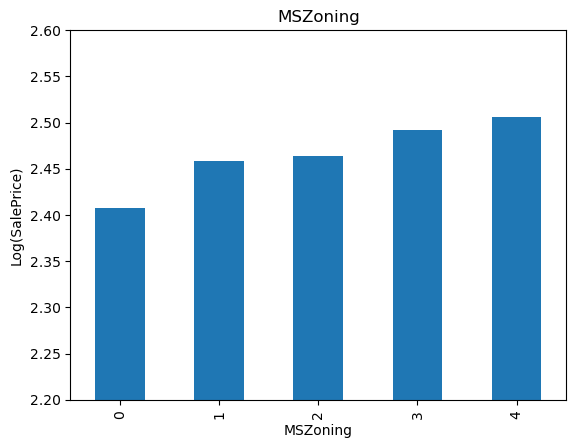

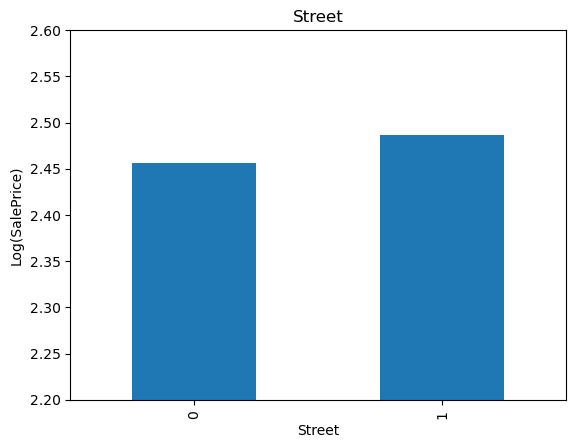

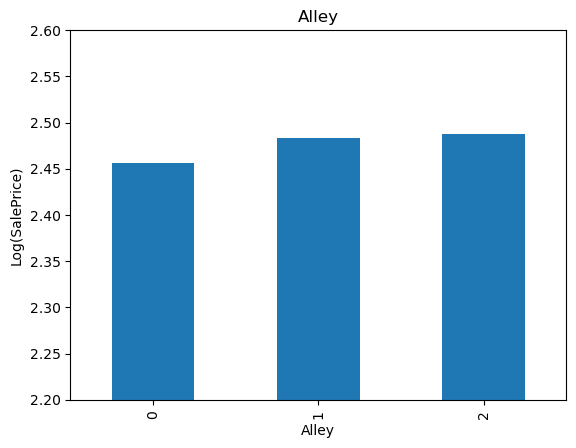

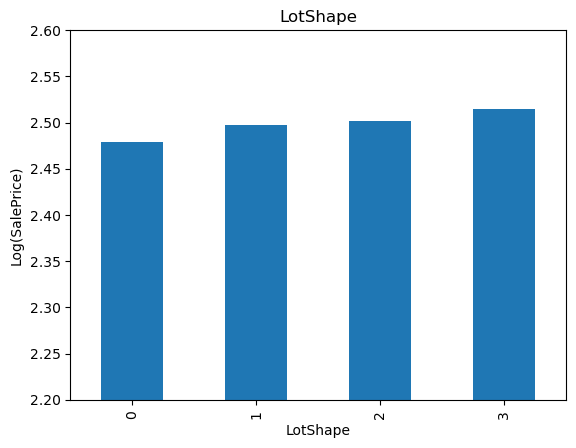

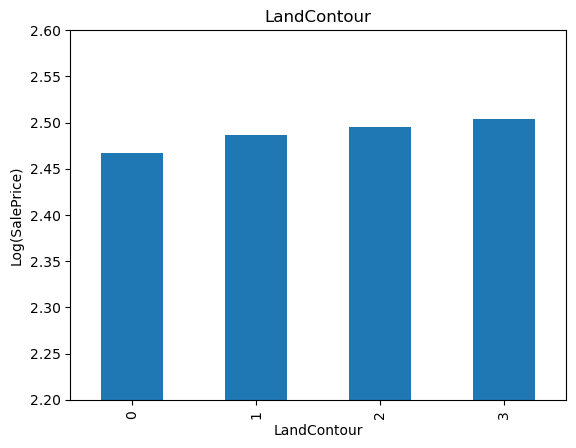

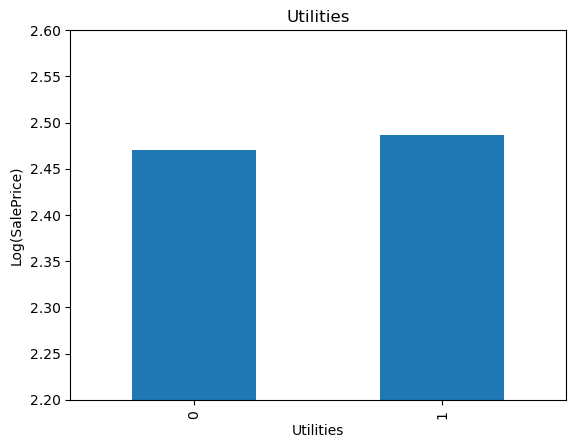

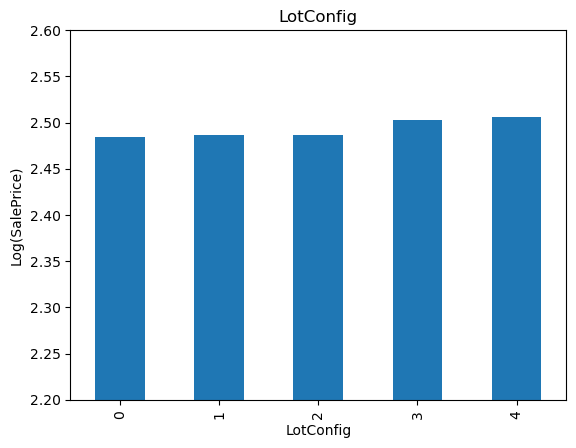

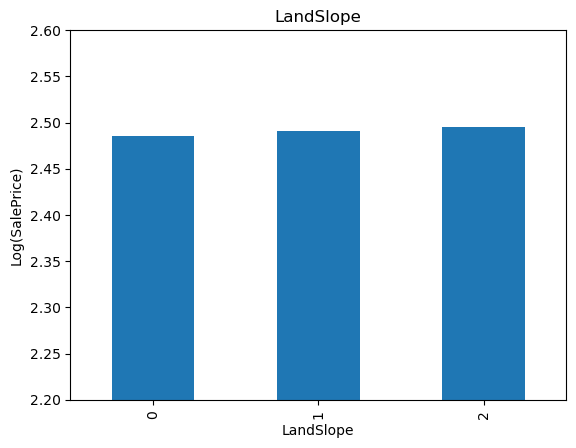

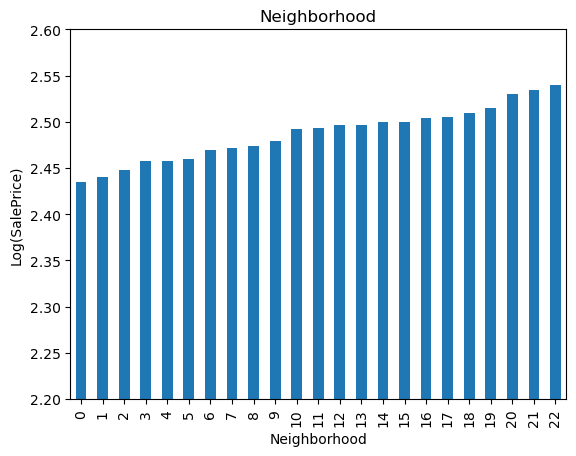

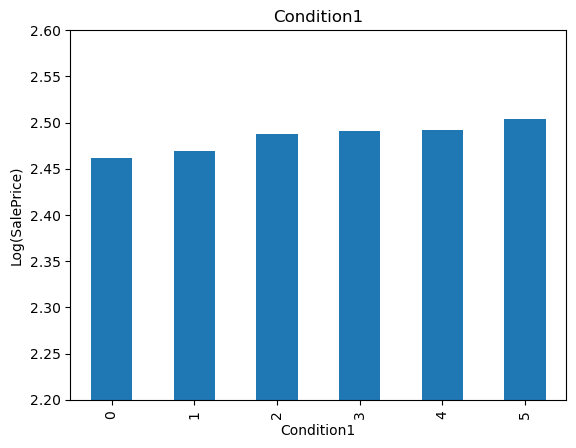

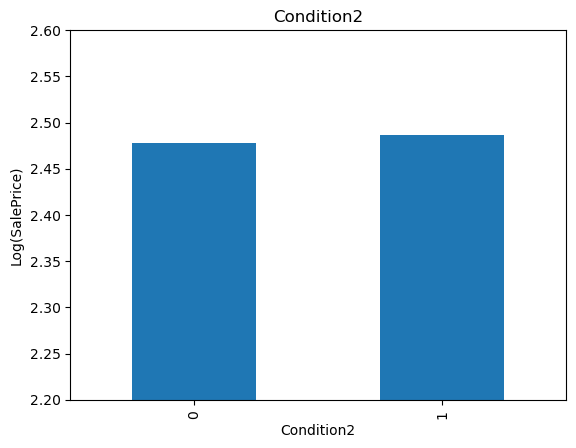

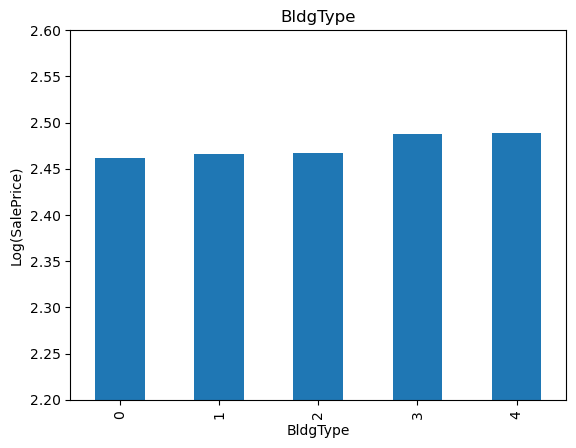

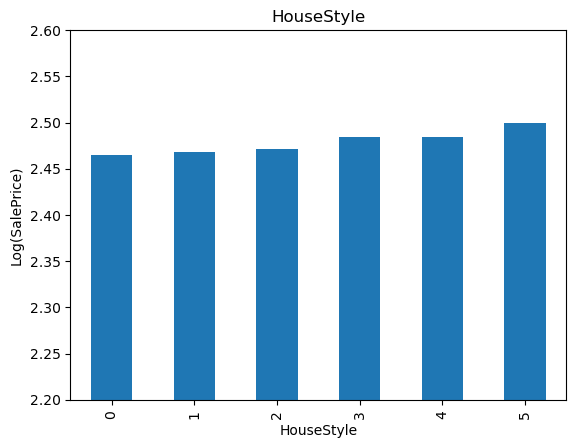

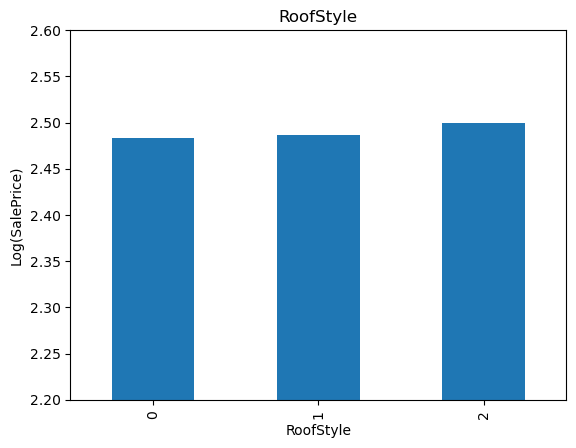

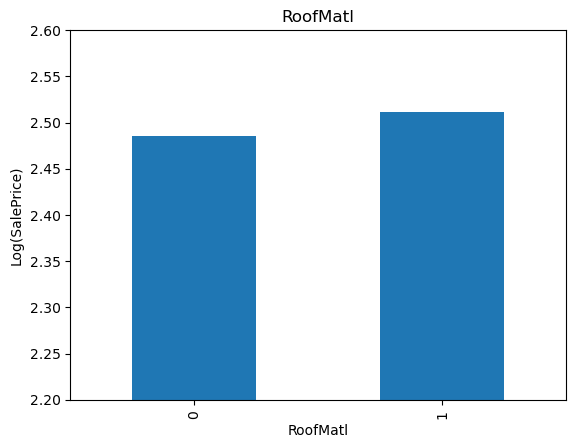

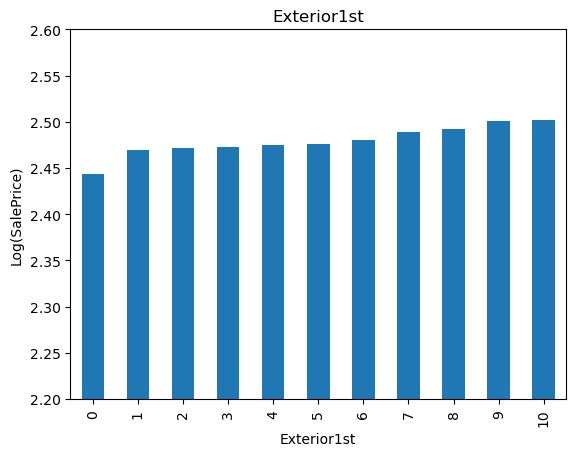

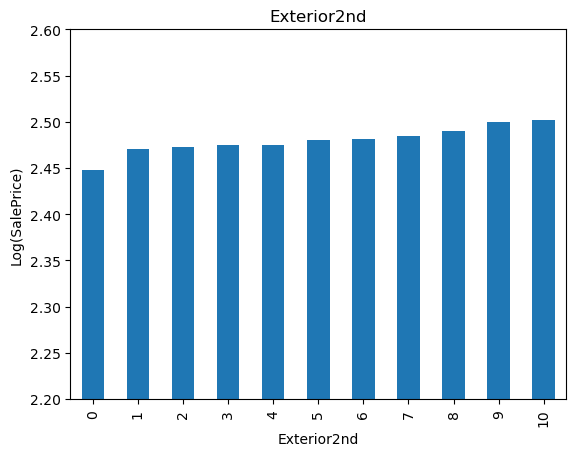

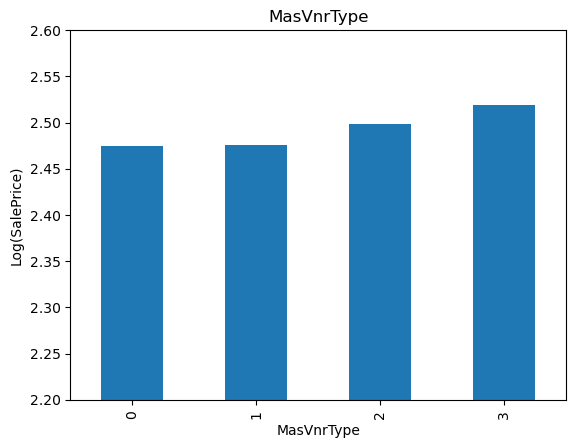

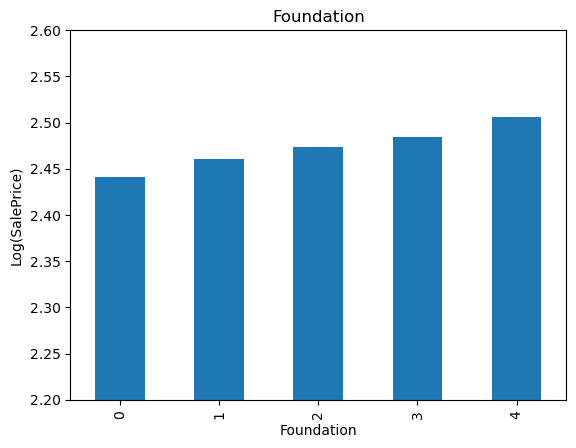

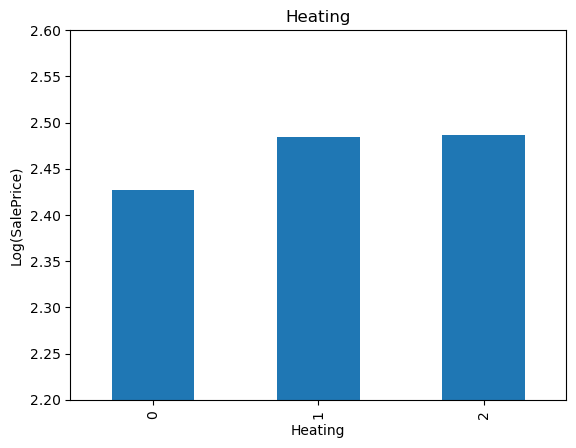

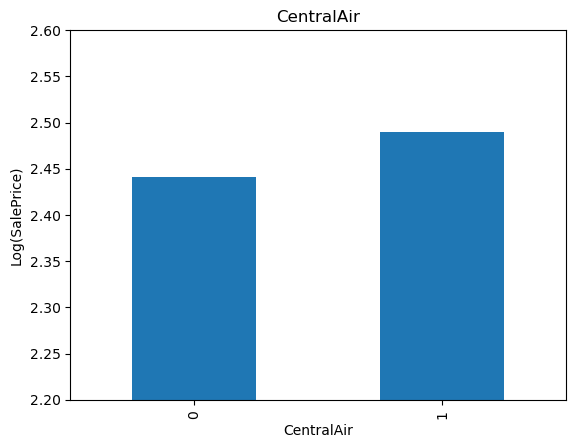

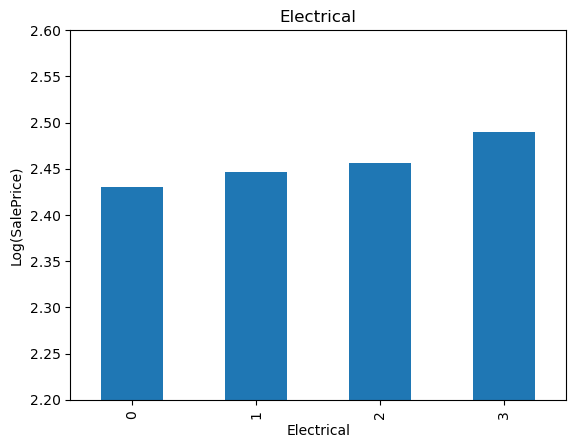

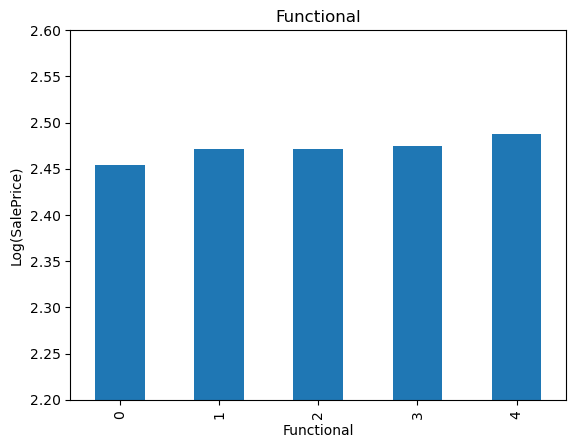

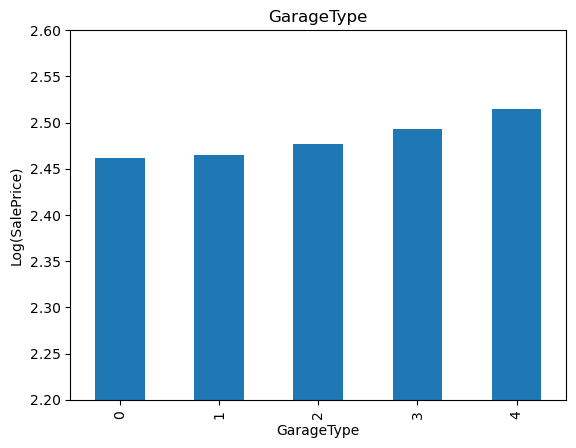

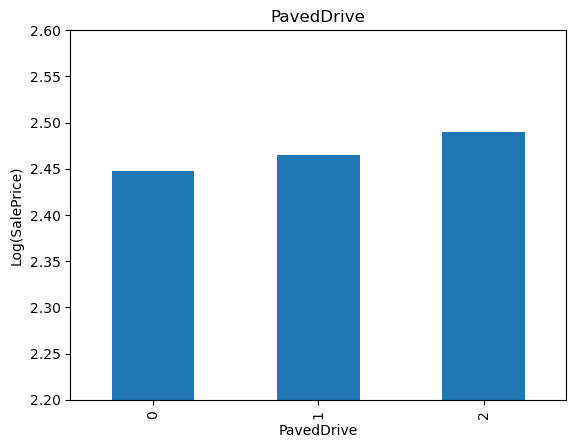

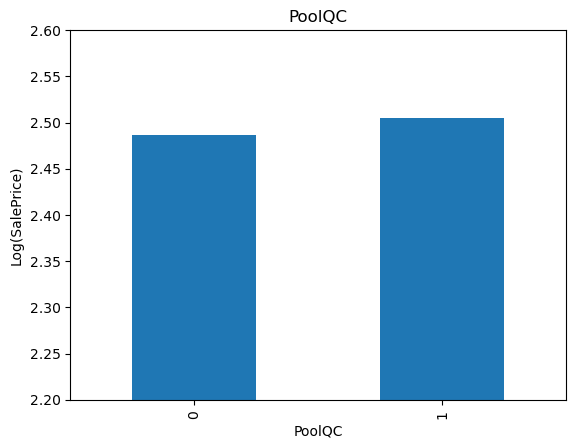

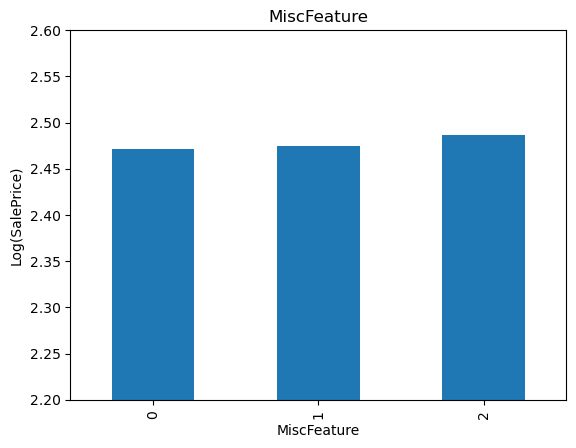

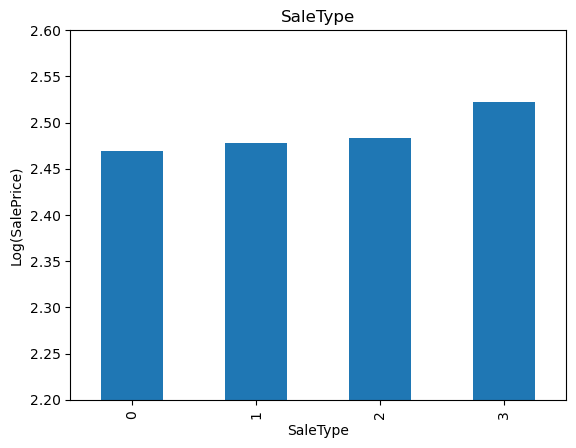

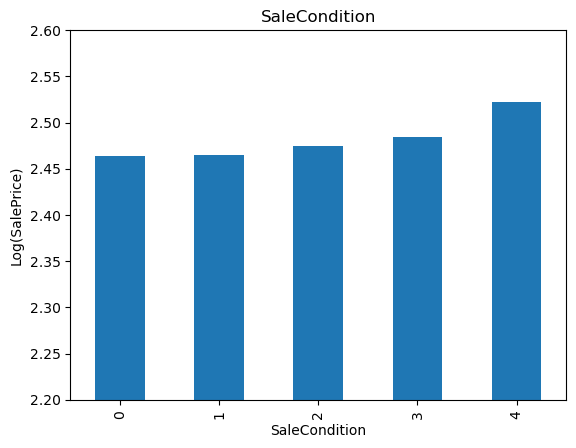

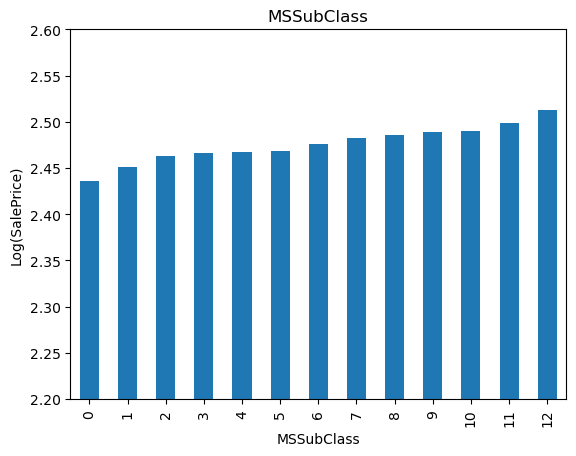

In [81]:
# Lets see the monotonic relationship between the categorical variables and the target

def analyse_vars(X_train, y_train, var):

    tmp = pd.concat([X_train, np.log(y_train)], axis=1)

    tmp.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('Log(SalePrice)')
    plt.show()

for var in cat_others:
    analyse_vars(X_train, y_train, var)

## Feature Scaling

For linear models, features need to be scaled.

In [83]:
# Create scaler
scaler = MinMaxScaler()

# Fit the scaler to the train set
scaler.fit(X_train)

#Transform the train and test set

X_train = pd.DataFrame(scaler.transform(X_train),
                          columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test),
                            columns=X_test.columns)


In [84]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [85]:
# Save the train and test set for next notebook

X_train.to_csv('../data/xtrain.csv', index=False)
X_test.to_csv('../data/xtest.csv', index=False)

y_train.to_csv('../data/ytrain.csv', index=False)
y_test.to_csv('../data/ytest.csv', index=False)


In [87]:
# Save the scaler
joblib.dump(scaler, '../Models/minmax_scaler.joblib')

['../Models/minmax_scaler.joblib']